# Surfingcrypto `Portfolio`

The `surfingcrypto` portfolio.

In [48]:
%load_ext autoreload
%autoreload 2
from surfingcrypto import Config
from surfingcrypto.portfolio import Portfolio
from surfingcrypto.portfolio.tracker import Tracker
from surfingcrypto.reporting.figures import PortfolioPlot
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
c = Config("/Users/giorgiocaizzi/Documents/GitHub/surfingcrypto/config")



In [3]:
p = Portfolio("coinbase",configuration=c)




####### PORTFOLIO 

MyCoinbase( isHistoric:True, last updated:2022-04-10 15:37:29.670343+00:00, N_accounts:31)


Warning! There are 14 transactionsthat were EXCLUDED in std_df.

Warning! Errors while handling transactions:
TransactionsHistory(Transactions:188 - Processed:188, Unhandled:0 - Errors:9)


In [4]:
print(p.coinbase.mycoinbase_report())

ALGO : EUR 191.90
AAVE : EUR 166.38
SUSHI : EUR 69.22
MATIC : EUR 347.54
UNI : EUR 122.85
ADA : EUR 146.07
USDC : EUR 0.01
---
Portfolio: EUR 1043.97


In [5]:
p.coinbase.active_accounts

['ALGO', 'AAVE', 'SUSHI', 'MATIC', 'UNI', 'ADA', 'USDC']

In [6]:
p.std_df.head()

,type,amount,symbol,native_amount,nat_symbol,total,subtotal,total_fee,spot_price,trade_id
datetime,,,,,,,,,,
2018-10-22T06:29:22Z,buy,0.017237,BTC,100.00,EUR,100.00,97.01,2.99,5627.999719,None
2018-11-09T12:05:12Z,sell,0.017237,BTC,93.27,EUR,93.27,96.26,2.99,5584.488743,None
2018-11-09T12:06:14Z,buy,348.021666,BAT,93.27,EUR,93.27,90.28,2.99,0.259409,None
2019-01-25T14:28:56Z,sell,348.021666,BAT,35.96,EUR,35.96,37.95,1.99,0.109045,None
2021-04-20T18:57:40Z,buy,0.258429,ETH,500.00,EUR,500.00,492.66,7.34,1906.364408,None


## Total fees

In [7]:
p.total_fees()


205.53999999999965

## Portfolio total investment`
Gets total investment buy summing up `fiat_deposit` and `fiat_withdrawal` investment.

<div class="alert alert-info">

Note

At the moment, when buying with a credit card, the transaction is not registered as `fiat_deposit` and so it is not included in this calculation.

</div>

In [8]:
p.coinbase.history.df[
    p.coinbase.history.df.type.isin(["fiat_deposit", "fiat_withdrawal"])
].groupby("type")[["amount"]].sum()



,amount
type,
fiat_deposit,1050.00
fiat_withdrawal,-35.96


## Portfolio value tracker

In [9]:
t = Tracker(p.std_df, stocks_start="1-1-2021", benchmark="ETH",configuration=c)



### Closedata

`Tracker` uses locally stored closedata to track the portfolio daily values.

In [10]:
t.closedata

,Date,Close,symbol
0,2017-10-01 00:00:00+00:00,3729.454806,BTC
1,2017-10-02 00:00:00+00:00,3758.690499,BTC
2,2017-10-03 00:00:00+00:00,3675.702350,BTC
3,2017-10-04 00:00:00+00:00,3597.924171,BTC
4,2017-10-05 00:00:00+00:00,3695.389871,BTC
...,...,...,...
11070,2022-04-05 00:00:00+00:00,0.765744,ALGO
11071,2022-04-06 00:00:00+00:00,0.704313,ALGO
11072,2022-04-07 00:00:00+00:00,0.737744,ALGO
11073,2022-04-08 00:00:00+00:00,0.696384,ALGO


The  `error_log` attributes contains the log from loading data.

In [11]:
t.error_log


[]

### Benchmark

Compare stocks to benchmark.

In [12]:
t.benchmark_df.head()


,Close
Date,
2017-10-01 00:00:00+00:00,256.044212
2017-10-02 00:00:00+00:00,253.580263
2017-10-03 00:00:00+00:00,248.989454
2017-10-04 00:00:00+00:00,248.964687
2017-10-05 00:00:00+00:00,252.593705


#### Portfolio start balance

Tracker module allows to consider transactions happened before the `stocks_start` date specified.

This is done adjusting past positions to the current value at `stocks_start` date.

In [13]:
t.active_positions.head()


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share
4,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408
5,2021-04-22 10:13:53+00:00,buy,0.062128,MKR,250.00,3964.873854
6,2021-04-22 19:20:15+00:00,sell,0.062128,MKR,213.69,3491.496921
7,2021-04-24 08:53:47+00:00,buy,210.343863,ADA,213.69,1.000980
8,2021-04-25 16:15:33+00:00,buy,0.350116,CGLD,1.65,4.712730


#### Daily snapshots

The module produces daily snapshots of the portfolio balance.

In [14]:
t.daily_snapshots[-1]


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Date Snapshot
155,2021-09-09 23:30:55+00:00,buy,152.199381,ADA,692.45,2.142006,2022-04-09 00:00:00+00:00
151,2021-08-26 19:45:55+00:00,buy,257.829804,MATIC,1360.65,1.174154,2022-04-09 00:00:00+00:00
147,2021-08-21 18:49:29+00:00,buy,0.006479,USDC,1117.38,0.854942,2022-04-09 00:00:00+00:00
157,2021-11-29 10:44:04+00:00,buy,21.493860,SUSHI,147.19,6.848002,2022-04-09 00:00:00+00:00
161,2021-12-23 07:27:08+00:00,buy,13.238243,UNI,195.91,14.798792,2022-04-09 00:00:00+00:00
163,2021-12-23 07:28:57+00:00,buy,1.001178,AAVE,195.57,195.339958,2022-04-09 00:00:00+00:00
172,2022-03-21 22:51:02+00:00,buy,266.411209,ALGO,196.42,0.737281,2022-04-09 00:00:00+00:00


### Portfolio calculations

All `daily_snapshots` are concatenated in a single dataframe, where for each row the following new attributes are calculated:

- Symbol Adj Close	    
- Adj cost daily	
- Benchmark Close	
- Benchmark DayOfBuy Close	
- Benchmark Equiv Shares	
- Benchmark Adj Cost Daily	
- symbol Return	
- Stock Gain / (Loss)	
- Benchmark Return	
- Benchmark Gain / (Loss)

In [15]:
t.daily_calcs

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Date Snapshot,Symbol Adj Close,Adj cost daily,Benchmark Close,Benchmark DayOfBuy Close,Benchmark Equiv Shares,Benchmark Adj Cost Daily,symbol Return,Stock Gain / (Loss),Benchmark Return,Benchmark Gain / (Loss)
0,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-20 00:00:00+00:00,1936.596366,500.472817,1936.596366,1936.596366,0.258185,500.000000,0.015858,7.812817,0.000000,0.000000
1,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-21 00:00:00+00:00,1964.593249,507.708026,1964.593249,1936.596366,0.258185,507.228373,0.030544,15.048026,0.014457,7.228373
2,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-22 00:00:00+00:00,2000.536891,516.996908,2000.536891,1936.596366,0.258185,516.508480,0.049399,24.336908,0.033017,16.508480
3,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-23 00:00:00+00:00,1953.619811,504.872170,1953.619811,1936.596366,0.258185,504.395197,0.024788,12.212170,0.008790,4.395197
4,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-24 00:00:00+00:00,1828.220570,472.465360,1828.220570,1936.596366,0.258185,472.019002,-0.040991,-20.194640,-0.055962,-27.980998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,2021-08-21 18:49:29+00:00,buy,0.006479,USDC,1117.38,0.854942,2022-04-09 00:00:00+00:00,0.919490,0.005957,2999.048132,2758.043679,0.405135,1215.019337,0.075500,0.000418,0.087382,97.639337
1759,2021-11-29 10:44:04+00:00,buy,21.493860,SUSHI,147.19,6.848002,2022-04-09 00:00:00+00:00,3.275918,70.412119,2999.048132,3936.273838,0.037393,112.144102,-0.521624,-76.777881,-0.238100,-35.045898
1760,2021-12-23 07:27:08+00:00,buy,13.238243,UNI,195.91,14.798792,2022-04-09 00:00:00+00:00,9.248885,122.438985,2999.048132,3627.940496,0.054000,161.949602,-0.375024,-73.471015,-0.173347,-33.960398
1761,2021-12-23 07:28:57+00:00,buy,1.001178,AAVE,195.57,195.339958,2022-04-09 00:00:00+00:00,169.821445,170.021436,2999.048132,3627.940496,0.053907,161.668540,-0.130636,-25.548564,-0.173347,-33.901460


Each day can be accessed by selecting via the `Date Snapshot` column.

In [16]:
t.daily_calcs.set_index("Date Snapshot").loc["2022-03-27"]

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Symbol Adj Close,Adj cost daily,Benchmark Close,Benchmark DayOfBuy Close,Benchmark Equiv Shares,Benchmark Adj Cost Daily,symbol Return,Stock Gain / (Loss),Benchmark Return,Benchmark Gain / (Loss)
Date Snapshot,,,,,,,,,,,,,,,,
2022-03-27 00:00:00+00:00,2021-09-09 23:30:55+00:00,buy,152.199381,ADA,692.45,2.142006,1.076485,163.840401,2997.369798,2898.501595,0.238899,716.069544,-0.497441,-162.171620,0.034110,23.619544
2022-03-27 00:00:00+00:00,2021-08-26 19:45:55+00:00,buy,257.829804,MATIC,1360.65,1.174154,1.542114,397.603027,2997.369798,2637.787884,0.515830,1546.133122,0.313383,94.871114,0.136319,185.483122
2022-03-27 00:00:00+00:00,2021-08-21 18:49:29+00:00,buy,0.006479,USDC,1117.38,0.854942,0.910654,0.005900,2997.369798,2758.043679,0.405135,1214.339385,0.065165,0.000361,0.086774,96.959385
2022-03-27 00:00:00+00:00,2021-11-29 10:44:04+00:00,buy,21.493860,SUSHI,147.19,6.848002,3.628505,77.990581,2997.369798,3936.273838,0.037393,112.081344,-0.470137,-69.199419,-0.238526,-35.108656
2022-03-27 00:00:00+00:00,2021-12-23 07:27:08+00:00,buy,13.238243,UNI,195.91,14.798792,10.376201,137.362662,2997.369798,3627.940496,0.054000,161.858971,-0.298848,-58.547338,-0.173810,-34.051029
2022-03-27 00:00:00+00:00,2021-12-23 07:28:57+00:00,buy,1.001178,AAVE,195.57,195.339958,153.883400,154.064620,2997.369798,3627.940496,0.053907,161.578067,-0.212228,-41.505380,-0.173810,-33.991933
2022-03-27 00:00:00+00:00,2022-03-21 22:51:02+00:00,buy,266.411209,ALGO,196.42,0.737281,0.863601,230.072928,2997.369798,2630.493433,0.074670,223.814805,0.171331,33.652928,0.139471,27.394805


The `daily_grouped_metrics()` method can be used to extract from the `daily_calcs` dataframe a single grouped timeseries of a selecred set of variables. By default all different assets are summed together, otherwise it is possible to keep data separated by simbol, with `by_simbol` set as `True`.

In [38]:
t.daily_grouped_metrics(
    ["Adj cost daily"])

variable,Adj cost daily
Date Snapshot,
2021-04-20,500.472817
2021-04-21,507.708026
2021-04-22,516.996908
2021-04-23,504.872170
2021-04-24,663.967701
...,...
2022-04-05,1162.573957
2022-04-06,1047.152545
2022-04-07,1095.390930


In [46]:
t.daily_grouped_metrics(
    ["Adj cost daily"],
    by_symbol=True
    ).iloc[-5:].dropna(axis=1)

Symbol,AAVE,ADA,ALGO,MATIC,SUSHI,UNI,USDC
variable,Adj cost daily,Adj cost daily,Adj cost daily,Adj cost daily,Adj cost daily,Adj cost daily,Adj cost daily
Date Snapshot,,,,,,,
2022-04-05,202.981765,163.394274,204.002873,376.589556,80.724306,134.875244,0.005939
2022-04-06,175.889172,147.030232,187.636837,345.122484,70.359430,121.108447,0.005943
2022-04-07,186.685538,152.957396,196.543267,359.295347,72.063584,127.839834,0.005964
2022-04-08,168.845813,143.617935,185.524524,340.336082,66.905473,118.229171,0.005955
2022-04-09,170.021436,146.233260,193.187300,347.120531,70.412119,122.438985,0.005957


It is possible to select multiple variables at the same time.

In [67]:
df=t.daily_grouped_metrics(
    ["Benchmark Gain / (Loss)","Stock Gain / (Loss)"],
    by_symbol=True
)
df.tail()

Symbol                           AAVE                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-05                 -26.928052            7.411765   
2022-04-06                 -38.680774          -19.680828   
2022-04-07                 -35.148798           -8.884462   
2022-04-08                 -37.363007          -26.724187   
2022-04-09                 -33.901460          -25.548564   

Symbol                            ACH                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-05                        NaN                 NaN   
2022-04-06                        NaN                 NaN   
2022-04-07                        NaN                 NaN   
2022-04-08                        NaN                 NaN   
2022-04-09                        NaN                 NaN   

Symbol                            ADA                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-05                  54.924723         -162.617748   
2022-04-06                   2.839891         -178.981789   
2022-04-07                  18.492640         -173.054625   
2022-04-08                   8.679875         -182.394086   
2022-04-09                  24.020497         -179.778762   

Symbol                           ALGO                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-05                  37.179557            7.582873   
2022-04-06                  20.899914           -8.783163   
2022-04-07                  25.792339            0.123267   
2022-04-08                  22.725260          -10.895476   
2022-04-09                  27.520127           -3.232700   

Symbol                            AMP                      ...  \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)  ...   
Date Snapshot                                              ...   
2022-04-05                        NaN                 NaN  ...   
2022-04-06                        NaN                 NaN  ...   
2022-04-07                        NaN                 NaN  ...   
2022-04-08                        NaN                 NaN  ...   
2022-04-09                        NaN                 NaN  ...   

Symbol                            SOL                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-05                        NaN                 NaN   
2022-04-06                        NaN                 NaN   
2022-04-07                        NaN                 NaN   
2022-04-08                        NaN                 NaN   
2022-04-09                        NaN                 NaN   

Symbol                          SUSHI                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-05                 -30.208676          -66.465694   
2022-04-06                 -38.361150          -76.830570   
2022-04-07                 -35.911135          -75.126416   
2022-04-08                 -37.447058          -80.284527   
2022-04-09                 -35.045898          -76.777881   

Symbol                            UNI                      \
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-04-05                 -26.974867          -61.034756   
2022-04-06                 -38.748021          -74.801553   
2022-04-07                 -35.209904          -68.070166   
2022-04-08                 -37.427962          -77.680829   
2022-04-09                 -33.960398          -73.471015   

Symbol                           USDC           

## Portfolio figures

The `surfingcrypto.reporting.figures` modules containes a custom `PortfolioPlot` class that is designed to plot figures for the stock calculation, as *Adj cost daily*  or *Stock Gain / (Loss)*.

Data can be selected by passing the `variable` - and optionally `by_symbol`-  as to a `daily_grouped_metrics()` function. 

Moreover, with `zero_line`as `True` it is possible to add an horizontal line at 0.
### Portfolio daily value 

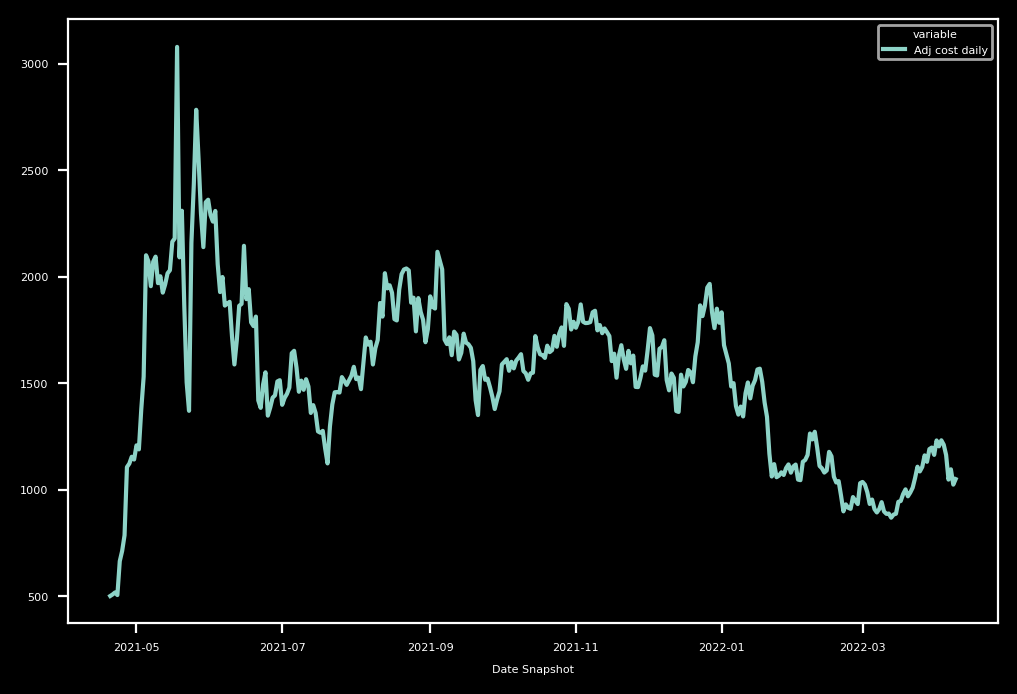

In [57]:
PortfolioPlot(variables=["Adj cost daily"],object=t)

### Portfolio gain/loss

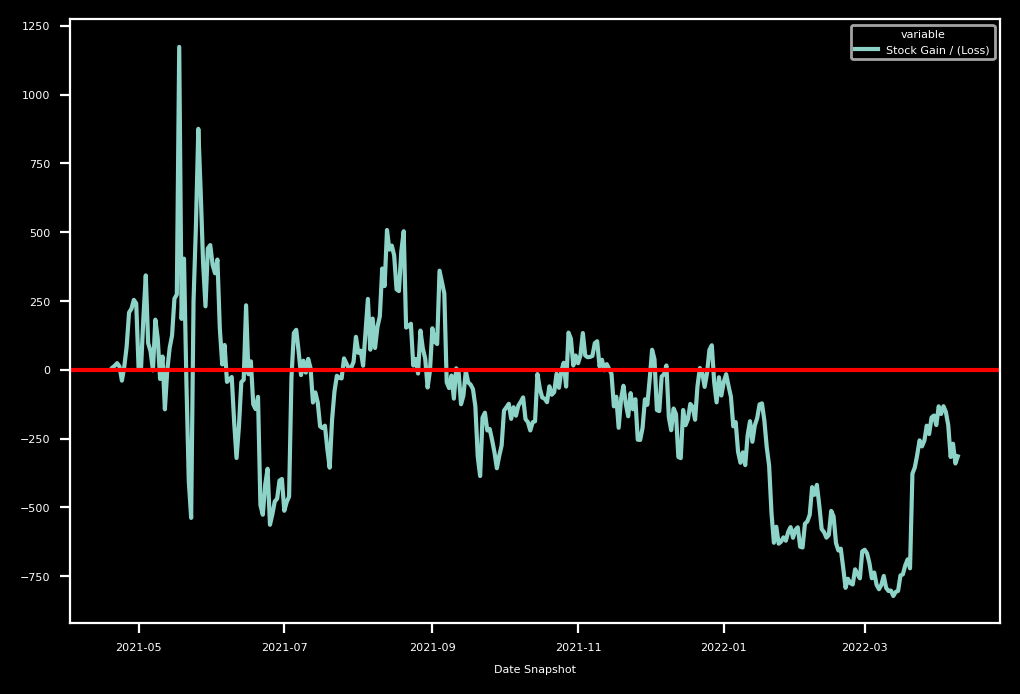

In [59]:
PortfolioPlot(variables=["Stock Gain / (Loss)"],zero_line=True,object=t)

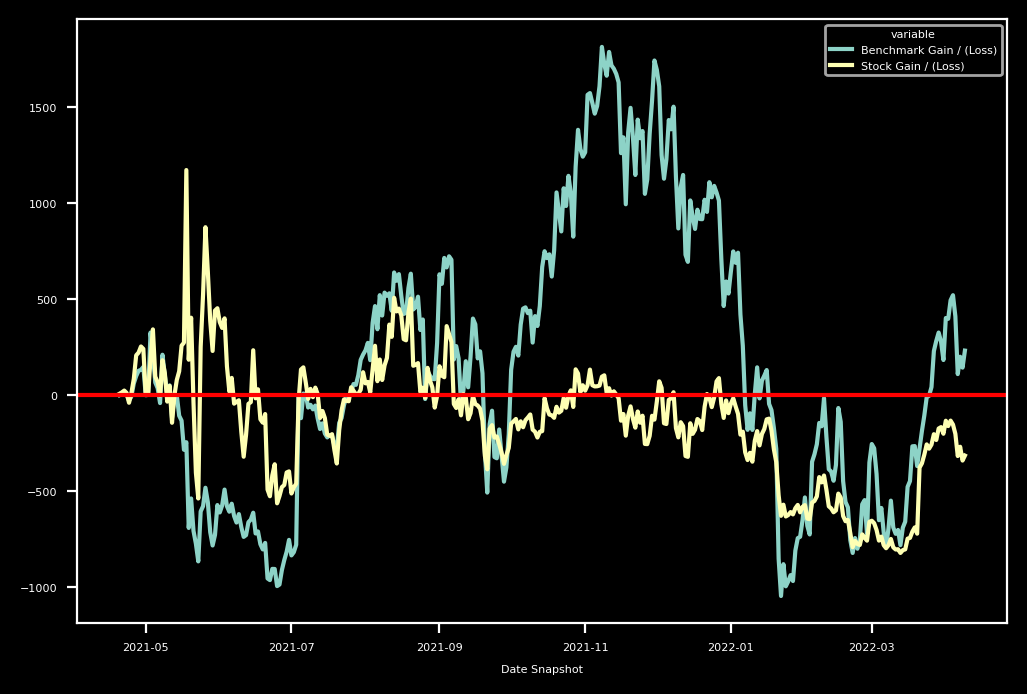

In [60]:
PortfolioPlot(variables=["Stock Gain / (Loss)","Benchmark Gain / (Loss)"],zero_line=True,object=t)

### Portfolio daily value by symbol


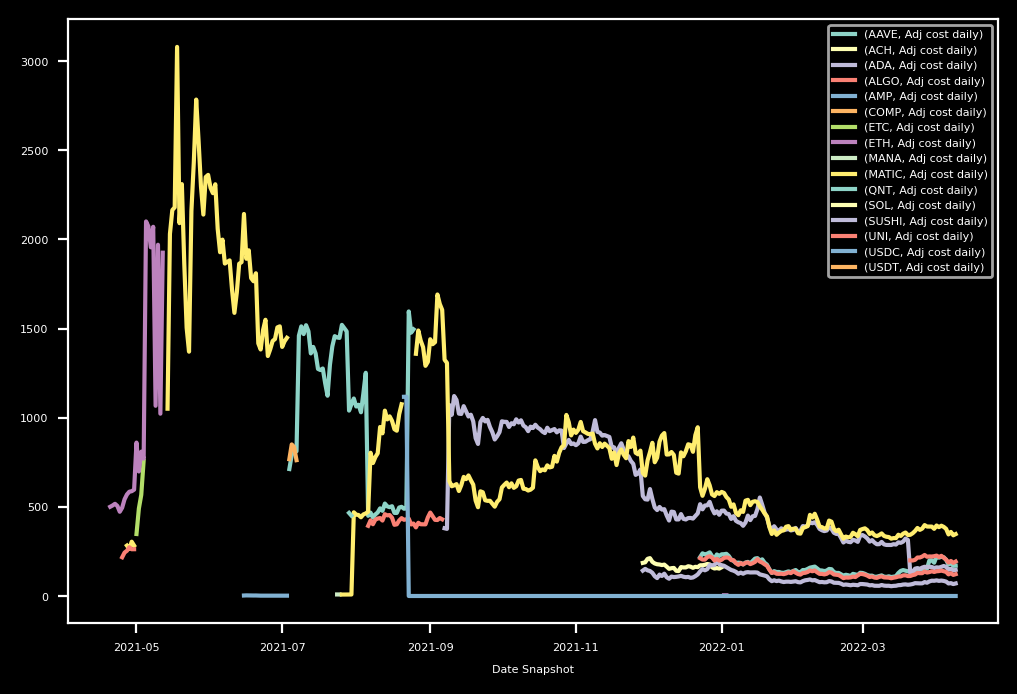

In [68]:
PortfolioPlot(variables=["Adj cost daily"],by_symbol=True,object=t)

## Stock gain by symbol

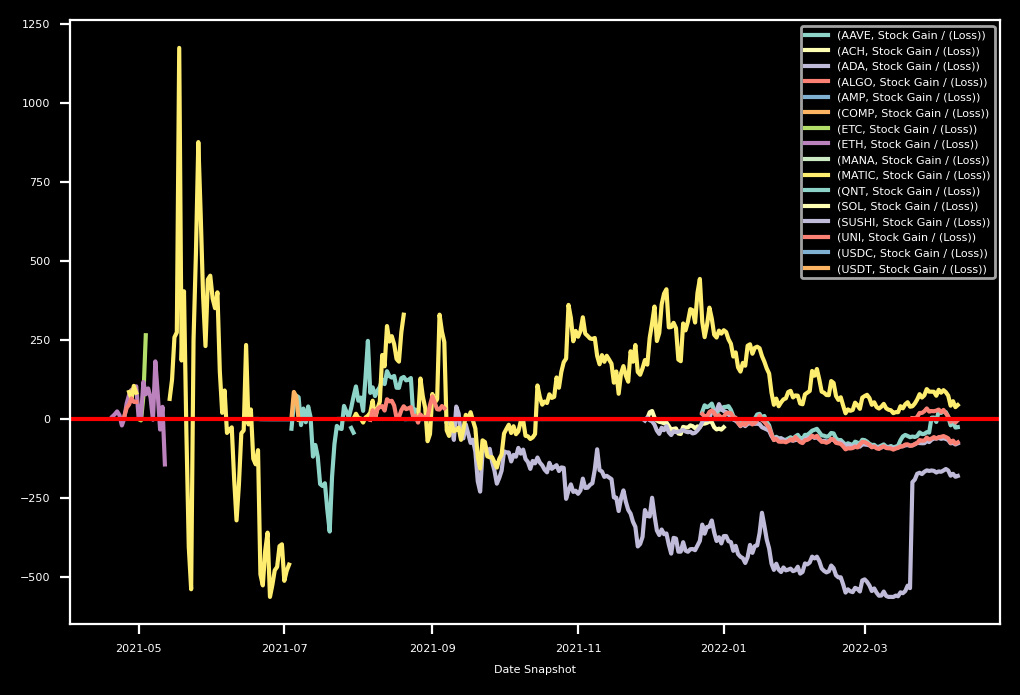

In [69]:
PortfolioPlot(variables=["Stock Gain / (Loss)"],by_symbol=True,zero_line=True,object=t)


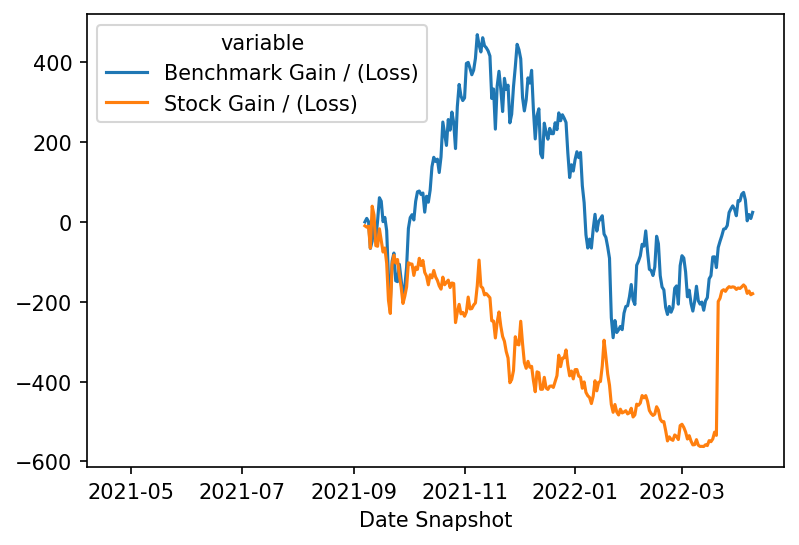

In [26]:
f, ax = plt.subplots(dpi=150)
df[("ADA")].plot(ax=ax)

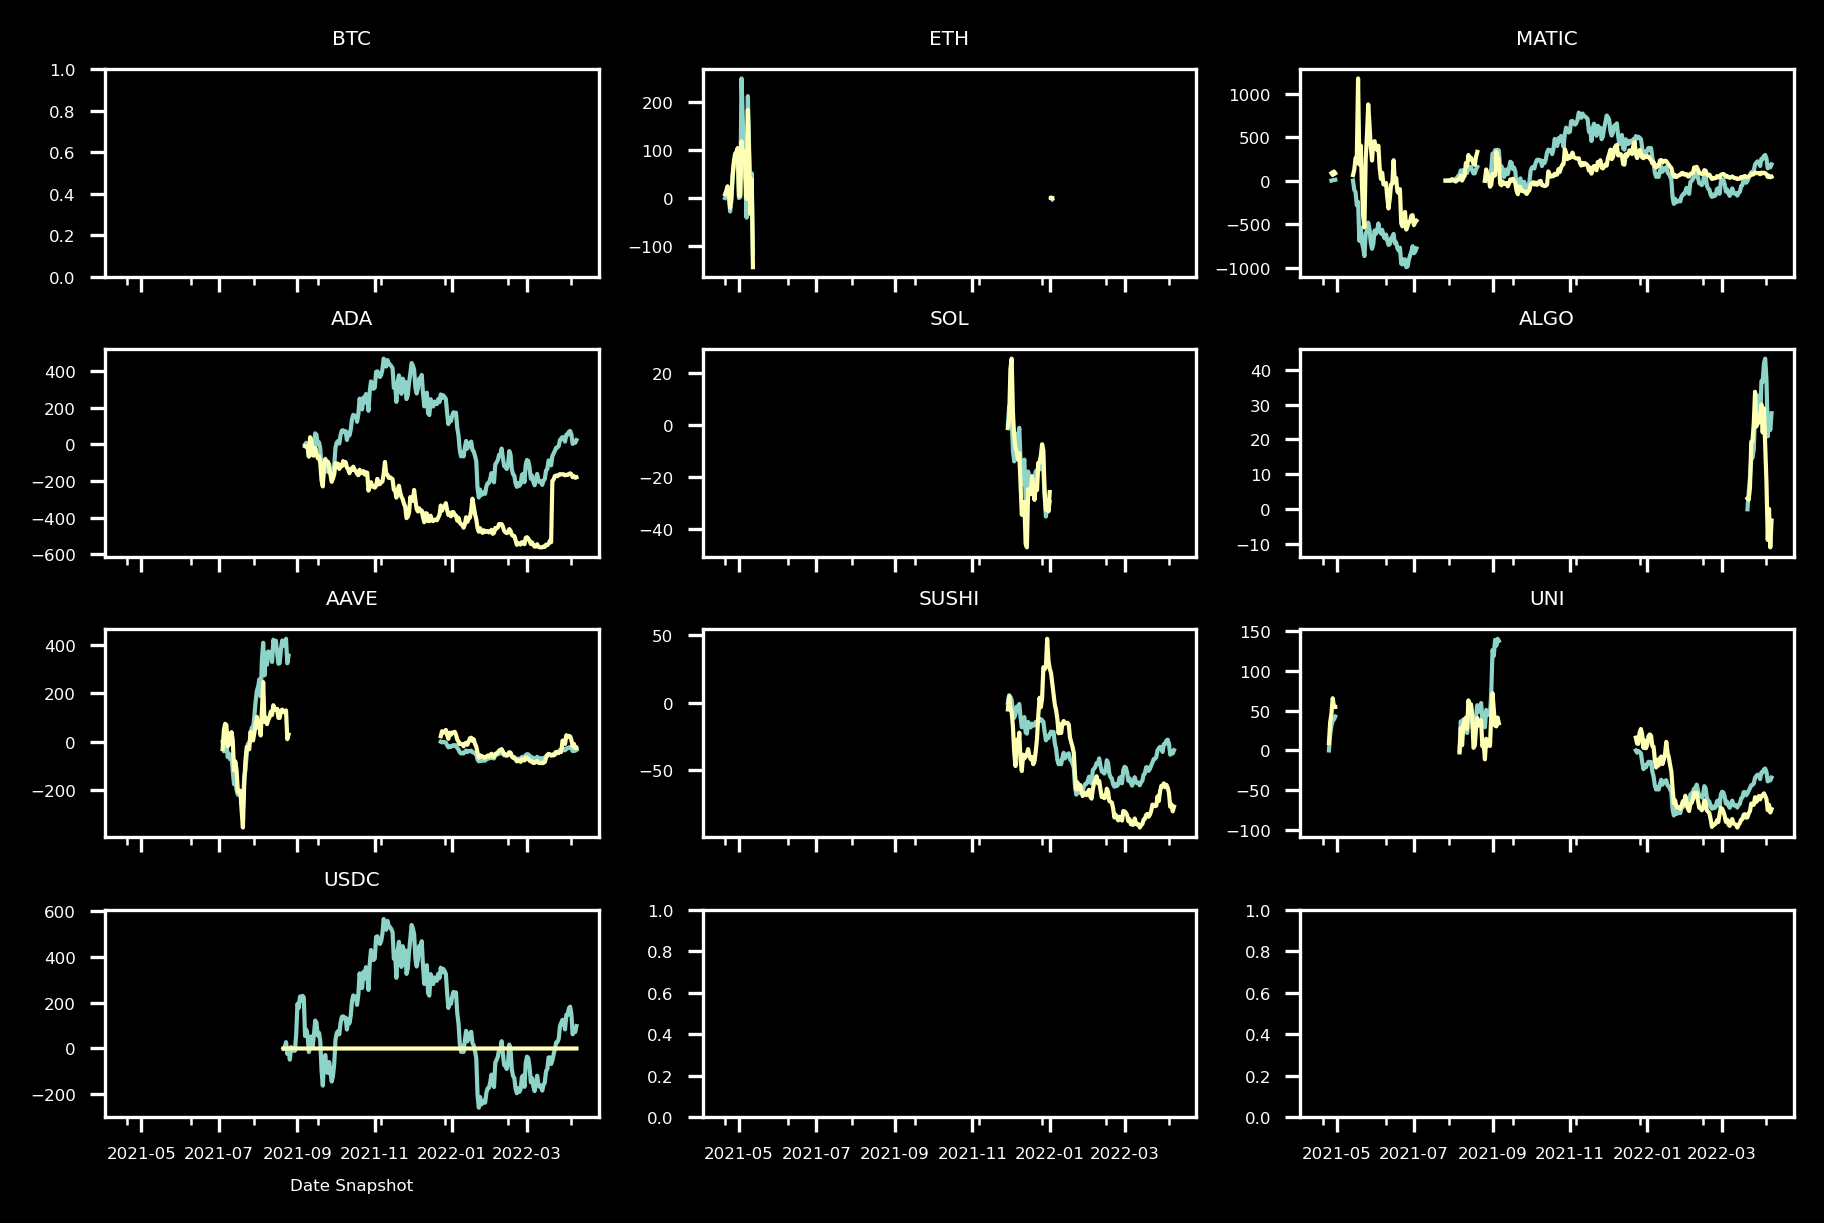

In [34]:
df=t.daily_grouped_metrics(
    ["Benchmark Gain / (Loss)","Stock Gain / (Loss)"],
    by_symbol=True
    )
uniqs=df.columns.get_level_values(0).unique()
plt.rcParams.update({'font.size': 4})


c.add_coins(p.coinbase.active_accounts)
select=c.coins

f,axes=plt.subplots(ncols=3,nrows=len(select)//3+len(select)%3,dpi=300,sharex=True)
for sel,ax in zip(select,axes.flatten()):
    if sel in set(df.columns.get_level_values(0)):
        df[(sel)].plot(ax=ax,legend=False,linewidth=1)
    ax.set_title(sel)
f.tight_layout()

#### Calplot

see investment throughout time.

In [31]:
values=t.daily_grouped_metrics(["Stock Gain / (Loss)"])
values.index=pd.to_datetime(values.index)
values=values.reset_index().set_index("Date Snapshot")
values

variable,Stock Gain / (Loss)
Date Snapshot,
2021-04-20,7.812817
2021-04-21,15.048026
2021-04-22,24.336908
2021-04-23,12.212170
2021-04-24,-39.242299
...,...
2022-04-05,-201.265517
2022-04-06,-316.686929
2022-04-07,-268.448544


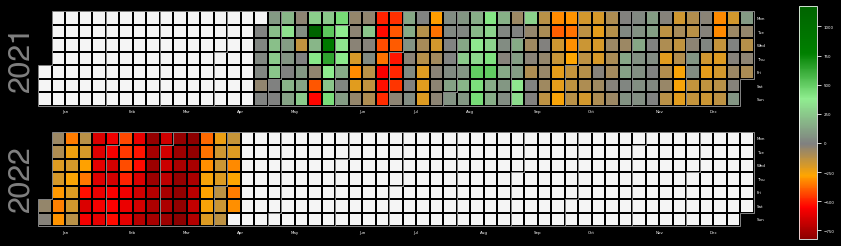

In [32]:
import calplot
from surfingcrypto.reporting.plotting import shiftedColorMap
import matplotlib.cm as cm
from matplotlib.colors import Normalize, LinearSegmentedColormap


norm = Normalize(vmin=values["Stock Gain / (Loss)"].min(), vmax=values["Stock Gain / (Loss)"].max())
cmap = shiftedColorMap(
    LinearSegmentedColormap.from_list(
        "colorbar",
        [
            "darkred",
            "red",
            "orange",
            "grey",
            "lightgreen",
            "green",
            "darkgreen",
        ],
    ),
    midpoint=norm(0)
)
calendarplot = calplot.calplot(
    values["Stock Gain / (Loss)"],
    cmap=cmap
    )

